# Non vectorized XOR Neural Network

In [41]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


In [3]:
class BaseModel(object):
    def __init__(self):
        self.model = None

    def fit(self, x, y):
        return NotImplemented

    def predict(self, x):
        return NotImplemented

In [48]:
class NNXor(BaseModel):
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def fit(self, x_train, y_train, lr=0.05, amt_epochs=3000):
        epoch_loss = []
        epoch_count = []
        w_out = np.random.uniform(0, 0.01, (2, 1))
        b_out = np.random.uniform(0, 0.01, 1)
        w_hidden = np.random.uniform(0, 0.01, (2, 2))
        b_hidden = np.random.uniform(0, 0.01, (2, 1))
        for i in range(amt_epochs):
            idx = np.random.permutation(x_train.shape[0])
            x = x_train[idx, :]
            y = y_train[idx, :]
            for k in range(4):
                # Feedforward
                z1 = x[k, 0] * w_hidden[0, 0] + x[k, 1] * w_hidden[0, 1] + b_hidden[0, 0]
                z2 = x[k, 0] * w_hidden[1, 0] + x[k, 1] * w_hidden[1, 1] + b_hidden[1, 0]
                a1 = self.sigmoid(z1)
                a2 = self.sigmoid(z2)
                prediction = a1 * w_out[0, 0] + a2 * w_out[1, 0] + b_out
                error = (y[k, 0]-prediction)
                
                # Backprop
                w_out[0, 0] = w_out[0, 0] - lr * (-2) * error * a1
                w_out[1, 0] = w_out[1, 0] - lr * (-2) * error * a2
                b_out = b_out - lr * (-2) * error
                w_hidden[0, 0] = w_hidden[0, 0] - lr * (-2) * error * w_out[0, 0] * a1 * (1 - a1) * x[k, 0] 
                w_hidden[0, 1] = w_hidden[0, 1] - lr * (-2) * error * w_out[0, 0] * a1 * (1 - a1) * x[k, 1]
                w_hidden[1, 0] = w_hidden[1, 0] - lr * (-2) * error * w_out[1, 0] * a2 * (1 - a2) * x[k, 0]
                w_hidden[1, 1] = w_hidden[1, 1] - lr * (-2) * error * w_out[1, 0] * a2 * (1 - a2) * x[k, 1]
            epoch_count.append(i)
            epoch_loss.append(error**2)
        self.model = [w_out, b_out, w_hidden, b_hidden]
        return epoch_count, epoch_loss
    
    def predict(self, x):
        x = x.reshape(-1, 2)
        z1 = x[0, 0] * self.model[2][0, 0] + x[0, 1] * self.model[2][0, 1] + self.model[3][0, 0]
        z2 = x[0, 0] * self.model[2][1, 0] + x[0, 1] * self.model[2][1, 1] + self.model[3][1, 0]
        a1 = self.sigmoid(z1)
        a2 = self.sigmoid(z2)
        y = a1 * self.model[0][0, 0] + a2 * self.model[0][1, 0] + self.model[1]
        return y
    

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [1]
 [1]
 [0]]
[1] [1.00007227]


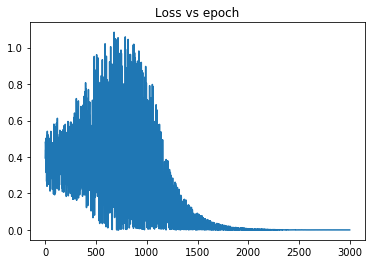

In [49]:
if __name__ == '__main__':
    x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    print(x)
    y = np.array([0, 1, 1, 0])
    y = y.reshape(-1, 1)
    print(y)
    NN = NNXor()
    epoch_count, epoch_loss = NN.fit(x, y, 0.1, 3000)
    y_predicted = NN.predict(x[1, :])
    print(y[1, :], y_predicted)
    
    plt.figure(1)
    plt.title("Loss vs epoch")
    plt.plot(epoch_count, epoch_loss)
    plt.show()